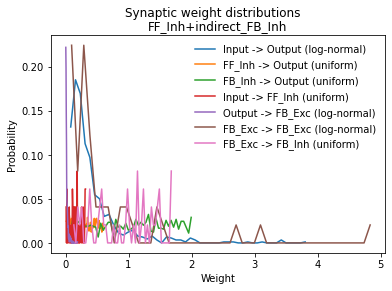

In [3]:
%run simulate_dynamic_model --config_file_path=config/simulate_config_5_FF_Inh+indirect_FB_Inh.yaml --plot

In [2]:
weight_dict.keys()

dict_keys(['Output', 'FF_Inh', 'FB_Exc', 'FB_Inh'])

In [5]:
type(weight_dict['Output'])

dict

In [4]:
weight_dict['Output'].keys()

dict_keys(['Input', 'FF_Inh', 'FB_Inh'])

In [6]:
type(weight_dict['Output']['Input'])

numpy.ndarray

In [7]:
weight_dict['Output']['Input'].shape

(7, 128)

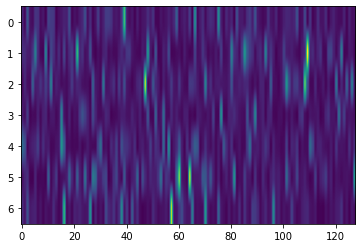

In [10]:
plt.figure()
plt.imshow(weight_dict['Output']['Input'], aspect='auto')

In [20]:
channel_conductance_dynamics_dict = {}
net_current_dynamics_dict = {}
cell_voltage_dynamics_dict = {}
network_activity_dynamics_dict = {}
input_patterns = sorted_input_patterns

for population in num_units_dict:
    network_activity_dynamics_dict[population] = np.empty((len(input_patterns), num_units_dict[population], len(t)))

for post_population in weight_dict:
    channel_conductance_dynamics_dict[post_population] = {}
    for pre_population in weight_dict[post_population]:
        channel_conductance_dynamics_dict[post_population][pre_population] = \
            np.empty((len(input_patterns), num_units_dict[pre_population], num_units_dict[post_population], len(t)))

    net_current_dynamics_dict[post_population] = \
        np.empty((len(input_patterns), num_units_dict[post_population], len(t)))


    cell_voltage_dynamics_dict[post_population] = \
        np.empty((len(input_patterns), num_units_dict[post_population], len(t)))

# for pattern_index in range(len(input_patterns)):
pattern_index = 10
this_input_pattern = input_patterns[pattern_index]
this_channel_conductance_dynamics_dict, this_net_current_dynamics_dict, this_cell_voltage_dynamics_dict, \
this_network_activity_dynamics_dict = \
    compute_network_activity_dynamics(t, this_input_pattern, num_units_dict, synapse_tau_dict, cell_tau_dict,
                                      weight_dict, weight_config_dict, activation_function_dict,
                                      synaptic_reversal_dict)
#     break
#     for population in this_network_activity_dynamics_dict:
#         network_activity_dynamics_dict[population][pattern_index, :, :] = \
#             this_network_activity_dynamics_dict[population]

#     for post_population in this_channel_conductance_dynamics_dict:
#         for pre_population in this_channel_conductance_dynamics_dict[post_population]:
#             channel_conductance_dynamics_dict[post_population][pre_population][pattern_index, :, :, :] = \
#                 this_channel_conductance_dynamics_dict[post_population][pre_population]
#         net_current_dynamics_dict[post_population][pattern_index, :, :] = \
#             this_net_current_dynamics_dict[post_population]
#         cell_voltage_dynamics_dict[post_population][pattern_index, :, :] = \
#             this_cell_voltage_dynamics_dict[post_population]

In [13]:
this_network_activity_dynamics_dict.keys()

dict_keys(['Input', 'FB_Exc', 'FB_Inh', 'FF_Inh', 'Output'])

In [16]:
this_network_activity_dynamics_dict['Input'].shape

(7, 351)

In [17]:
this_network_activity_dynamics_dict['Output'].shape

(128, 351)

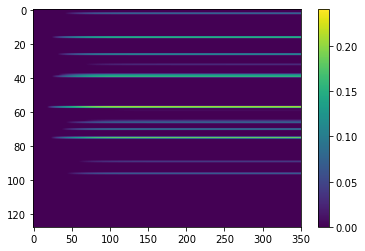

In [24]:
plt.imshow(this_network_activity_dynamics_dict['Output'], aspect='auto')
plt.colorbar()

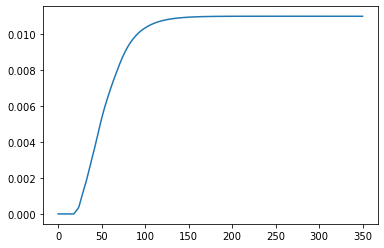

In [23]:
plt.plot(np.mean(this_network_activity_dynamics_dict['Output'], axis=0))

In [35]:
def slice_network_activity_dynamics_single_input_pattern_dict(network_activity_dynamics_dict, t, time_point):
    """
    Given network activity dynamics for a single input pattern over all time points, return network activity at the time point specified.
    :param network_activity_dynamics_dict: dict of 2d array of float;
        {'population label':
            2d array of float (number of units in this population, number of time points)
        }
    :param t: array of float
    :param time_point: list or tuple of float
    :return: dict of 1d array of float;
        {'population label':
            1d array of float (number of units in this population)
        }
    """
    mean_network_activity_dict = {}

#     if isinstance(time_point, (tuple, list)) and len(time_point) == 2:
    t_start_index = np.where(t >= time_point[0])[0][0]
    t_end_index = np.where(t >= time_point[1])[0][0]
    for population in network_activity_dynamics_dict:
        mean_network_activity_dict[population] = \
            np.mean(network_activity_dynamics_dict[population][:, t_start_index:t_end_index], axis=1)


    return mean_network_activity_dict

In [28]:
type(np.where(t >= time_point[0]))

tuple

In [31]:
np.where(t >= time_point[0])[0][0]

150

In [26]:
print(t)

[0.    0.001 0.002 0.003 0.004 0.005 0.006 0.007 0.008 0.009 0.01  0.011
 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022 0.023
 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034 0.035
 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046 0.047
 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058 0.059
 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07  0.071
 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082 0.083
 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094 0.095
 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106 0.107
 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118 0.119
 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.129 0.13  0.131
 0.132 0.133 0.134 0.135 0.136 0.137 0.138 0.139 0.14  0.141 0.142 0.143
 0.144 0.145 0.146 0.147 0.148 0.149 0.15  0.151 0.152 0.153 0.154 0.155
 0.156 0.157 0.158 0.159 0.16  0.161 0.162 0.163 0.

In [27]:
print(time_point[0])

0.15


In [37]:
mean_network_activity_dict = slice_network_activity_dynamics_single_input_pattern_dict(this_network_activity_dynamics_dict, t, time_point)

In [39]:
mean_network_activity_dict['Output']

array([0.        , 0.        , 0.0796301 , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.17243959, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.11987823, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02856983, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.10949814, 0.1610273 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.24020613, 0.        , 0.0063505 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03242716, 0.07481255, 0.        , 0.        , 0.        ,
       0.09197777, 0.        , 0.        , 0.        , 0.     

In [5]:
def plot_activity_summary(network_activity_dict, description=None):
    """
    Generate a panel of plots summarizing the activity of each layer.
    :param network_activity_dict: dict:
        {'population label': 2d array of float (number of input patterns, number of units in this population)
        }
    :param description: str
    """
    num_of_populations = len(network_activity_dict)

    fig1, axes = plt.subplots(1, num_of_populations, figsize=(3 * num_of_populations, 3))
    for i, population in enumerate(network_activity_dict):
        # Show activity heatmap of units for all patterns
        argmax_indices = np.argmax(network_activity_dict[population], axis=0)
        sorted_indices = np.argsort(argmax_indices)
        im1 = axes[i].imshow(network_activity_dict[population][:, sorted_indices].transpose(), aspect='auto', cmap='binary')
        # im1 = axes[i].imshow(network_activity_dict[population], aspect='auto')
        cbar = plt.colorbar(im1, ax=axes[i])
        cbar.ax.set_ylabel('Unit activity', rotation=270, labelpad=20)
        axes[i].set_ylabel('Unit ID')
        axes[i].set_xlabel('Input pattern ID')
        axes[i].set_title('Activity\n%s population' % population)


    if description is not None:
        fig1.suptitle(description)

    fig1.tight_layout(w_pad=3, h_pad=2, rect=(0., 0., 1., 0.98))
    fig1.show()

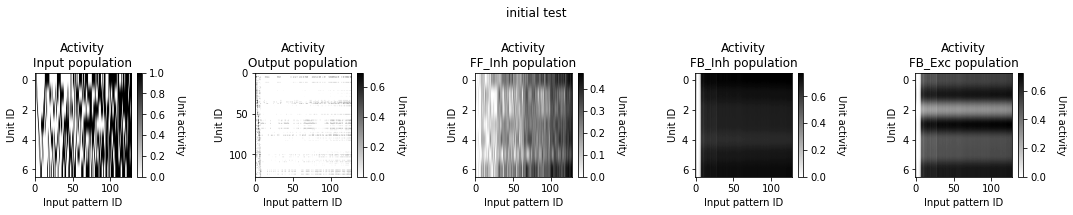

In [6]:
plot_activity_summary(initial_activity_dict, description='initial test')

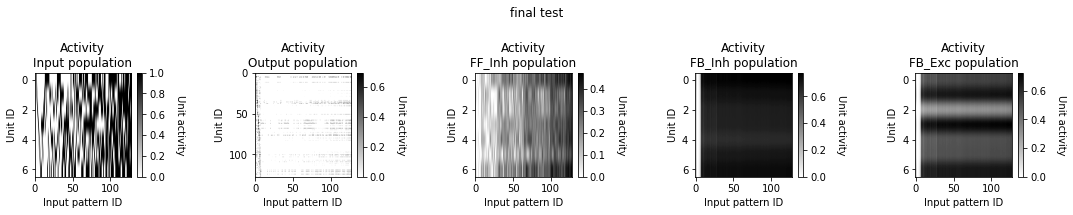

In [7]:
plot_activity_summary(final_activity_dict, description='final test')

In [9]:
weight_history_dict['Output']['Input'].shape

(128, 7, 128)

In [10]:
np.all(weight_history_dict['Output']['Input'][0]==weight_history_dict['Output']['Input'][-1])

False

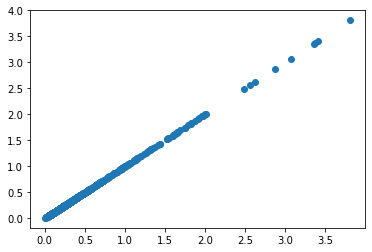

In [11]:
plt.scatter(weight_history_dict['Output']['Input'][0].flatten(), weight_history_dict['Output']['Input'][-1].flatten())

In [13]:
delta_weight = np.subtract(weight_history_dict['Output']['Input'][-1], weight_history_dict['Output']['Input'][0])
print(np.min(delta_weight))
print(np.max(delta_weight))
print(np.mean(delta_weight))
print(np.min(weight_history_dict['Output']['Input'][0]))
print(np.max(weight_history_dict['Output']['Input'][0]))
print(np.mean(weight_history_dict['Output']['Input'][0]))

0.0
0.012680739273899455
0.0009723496617563849
0.006796112363165174
3.8037970729234574
0.3891459847684341


In [15]:
np.count_nonzero(delta_weight)

605